# Experiment 9- KMeans Clustering

### AIM- Demonstrate k means clustering on iris dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import datasets
sns.set()

In [ ]:
iris_data = pd.read_csv('iris.csv')
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
iris_data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

###K-Means Clustering (Silhouette Coefficients)

In [ ]:
data = iris_data.copy()
X = data.drop(columns=['Species'])
y = iris_data['Species']

In [ ]:
from sklearn.metrics import silhouette_score
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(x)
    label = kmeans.labels_
    sil_coeff = silhouette_score(x, label, metric='euclidean')
    print(f"{n_cluster} n_clusters: Silhouette Coefficient = {sil_coeff}")

2 n_clusters: Silhouette Coefficient = 0.6205786765196579
3 n_clusters: Silhouette Coefficient = 0.5820898597618552
4 n_clusters: Silhouette Coefficient = 0.5568960211268352
5 n_clusters: Silhouette Coefficient = 0.5411170082028827
6 n_clusters: Silhouette Coefficient = 0.5322001264106738
7 n_clusters: Silhouette Coefficient = 0.5191196113307869
8 n_clusters: Silhouette Coefficient = 0.5087651863986412
9 n_clusters: Silhouette Coefficient = 0.5096484169182929
10 n_clusters: Silhouette Coefficient = 0.49474898379667565


###K-Means Clustering (Elbow Method)

In [ ]:
from sklearn.cluster import KMeans
x = iris_data.iloc[:, [0, 1, 2, 3]].values
wcss = [] # WCSS is the sum of squared distance between each point and the centroid in a cluster

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

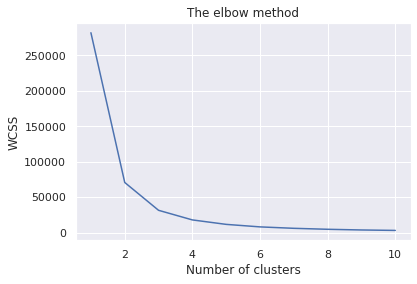

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

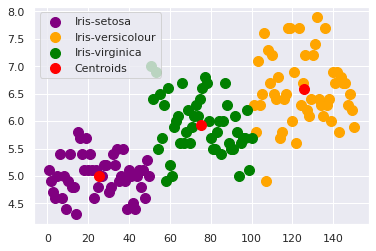

In [ ]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

### Training Model

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3,n_init=1,init='random', max_iter=10000, random_state=21,algorithm="auto")
fitted_model = model.fit(X)
labels = model.labels_
centers = pd.DataFrame(fitted_model.cluster_centers_)
print(f'Cluster centers: \n {centers}')

Cluster centers: 
        0         1         2         3         4
0  125.0  6.570588  2.970588  5.523529  2.011765
1   74.5  5.922000  2.780000  4.206000  1.304000
2   25.0  5.006122  3.420408  1.465306  0.244898


### Visualize Predictions K-Means

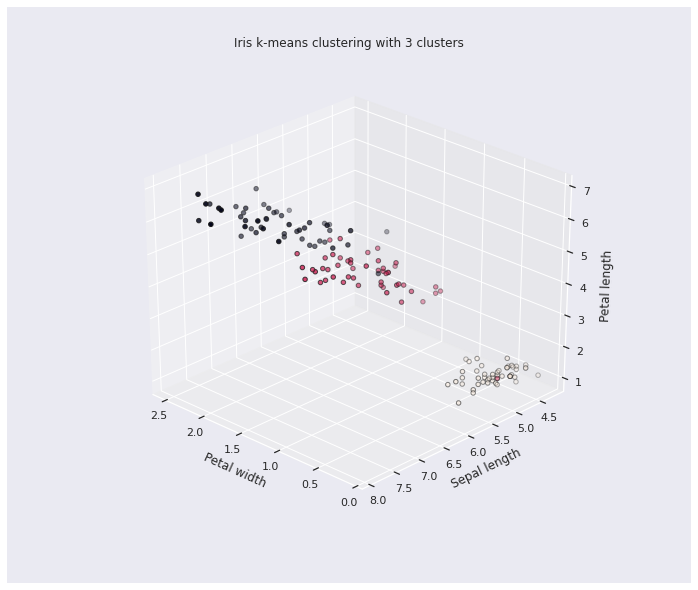

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig,
            rect=[0, 0, .95, 1],
            elev=30,
            azim=134)
model.fit(X)
labels = model.labels_

ax.set_title("Iris k-means clustering with 3 clusters")
ax.scatter(X["PetalWidthCm"], X["SepalLengthCm"], X["PetalLengthCm"],c=labels.astype(np.float), edgecolor='k')
ax.set_xlabel('Petal width',labelpad=10)
ax.set_ylabel('Sepal length',labelpad=10)
ax.set_zlabel('Petal length',labelpad=10)
ax.dist = 13
plt.savefig("kclusters.png")